<a href="https://colab.research.google.com/github/jalva53/colab-320-jra/blob/main/portfolio_optimization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

# Define the list of 20 stock tickers
stocks = [
    'NVDA','PLTR','PFE','TSLA','LCID',
  'RIVN','AMZN','BE','SMCI','GRAB',
  'F','NU','NIO','SOFI','MARA',
    'INTC','RKLB','AMD','WBD','IONQ'
]

# Download adjusted closing prices for the specified stocks
data = yf.download(stocks, start='2023-11-26', end='2024-11-25')['Adj Close']
#data = yf.download(stocks, period='1y')['Adj Close']
#data = yf.download(stocks, period='3mo')['Adj Close']
stocks=sorted(stocks) #sort stocks alphabetically
data.to_csv("stocks.csv") #optional, if you want to transfer the data to excel and oerform the analysis in Excel

[*********************100%***********************]  20 of 20 completed


In [ ]:
# Calculate daily returns
daily_returns = data.pct_change()
# Calculate mean returns and covariance matrix
mean_returns = daily_returns.mean()
data=mean_returns
data.to_csv("daily_returns.csv")
print(daily_returns)

Ticker                          AMD      AMZN        BE         F      GRAB  \
Date                                                                          
2023-11-27 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2023-11-28 00:00:00+00:00 -0.005218 -0.004738  0.041507  0.002901 -0.003268   
2023-11-29 00:00:00+00:00  0.015081 -0.004829  0.056089  0.021215  0.009836   
2023-11-30 00:00:00+00:00 -0.021720 -0.001572  0.009084 -0.031161 -0.012987   
2023-12-01 00:00:00+00:00  0.001898  0.006434  0.065097  0.031189  0.009868   
...                             ...       ...       ...       ...       ...   
2024-11-12 00:00:00+00:00 -0.025246  0.010008 -0.005874 -0.011576  0.116438   
2024-11-13 00:00:00+00:00 -0.030147  0.024843  0.004431  0.000000  0.000000   
2024-11-14 00:00:00+00:00 -0.003302 -0.012237 -0.023529 -0.002703 -0.032720   
2024-11-15 00:00:00+00:00 -0.028378 -0.041942  0.591867 -0.005420  0.000000   
2024-11-18 00:00:00+00:00  0.029874 -0.004491  0.078

In [ ]:
!pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 87.3 MB/s eta 0:00:00


In [ ]:
# Number of stocks
n = len(stocks)

# Create a Gurobi model for the minimum variance portfolio
m = gp.Model("Min_Variance_Portfolio")

# Add variables for the weights of the stocks (w_i)
weights = m.addVars(n, lb=0, ub=1, name="weights")

# Set the objective to minimize portfolio variance: w' * Cov * w
portfolio_variance = sum(cov_matrix.iloc[i, j] * weights[i] * weights[j]
                         for i in range(n) for j in range(n))
m.setObjective(portfolio_variance, GRB.MINIMIZE)

# Add constraint: Sum of weights = 1 (i.e., fully invested)
m.addConstr(sum(weights[i] for i in range(n)) == 1, "Budget")

# Optimize the model
m.optimize()

# Extract the optimal weights and expected return of the portfolio
if m.status == GRB.OPTIMAL:
    optimal_weights = [weights[i].X for i in range(n)]
    optimal_return = sum(mean_returns.iloc[i] * optimal_weights[i] for i in range(n))

    # Display the optimal portfolio weights
    optimal_portfolio = pd.Series(optimal_weights, index=stocks)
    print("Optimal Minimum Variance Portfolio Weights:")
    print(optimal_portfolio)
    print("Minimum Variance of the Optimal Portfolio: {:.6f}".format(m.ObjVal))
    print("Expected Return of the Optimal Portfolio: {:.4}".format(optimal_return))
else:
    print("Optimization was not successful.")

Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0x82ee5268
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-06, 1e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.02s
Presolved: 1 rows, 20 columns, 20 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 1.900e+02
 Factor NZ  : 2.100e+02
 Factor Ops : 2.870e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal        

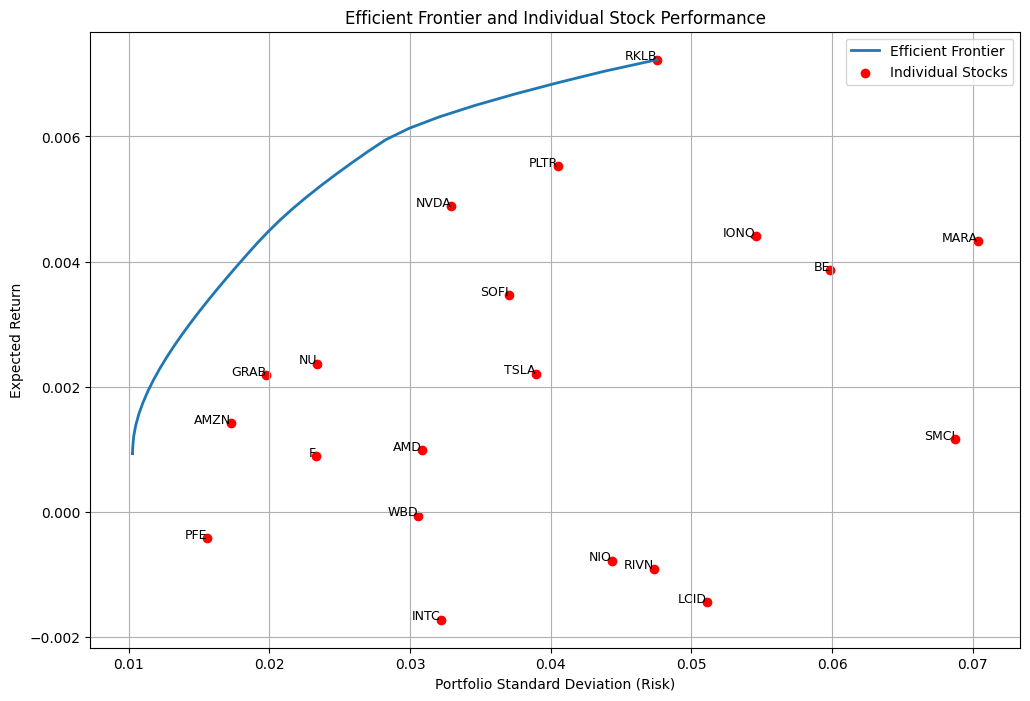

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to find the minimum variance portfolio for a given target return
def min_variance_portfolio(target_return):
    # Create a Gurobi model
    m = gp.Model("Min_Variance_Portfolio")
    m.setParam('OutputFlag', 0)  # Suppress output

    # Add variables for the weights of the stocks (w_i)
    weights = m.addVars(n, lb=0, ub=1, name="weights")

    # Set the objective to minimize portfolio variance: w' * Cov * w
    portfolio_variance = sum(cov_matrix.iloc[i, j] * weights[i] * weights[j]
                             for i in range(n) for j in range(n))
    m.setObjective(portfolio_variance, GRB.MINIMIZE)

    # Add constraint: Sum of weights = 1 (i.e., fully invested)
    m.addConstr(sum(weights[i] for i in range(n)) == 1, "Budget")

    # Add constraint: Target return
    portfolio_return = sum(mean_returns.iloc[i] * weights[i] for i in range(n))
    m.addConstr(portfolio_return >= target_return, "Target_Return")

    # Optimize the model
    m.optimize()

    # If optimal, extract the portfolio variance and return
    if m.status == GRB.OPTIMAL:
        return np.sqrt(m.ObjVal), sum(mean_returns.iloc[i] * weights[i].X for i in range(n))
    else:
        return None, None

# Define a range of target returns
target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 50)

# Calculate the corresponding portfolio standard deviations and returns
std_devs = []
eff_returns = []
for tr in target_returns:
    std_dev, eff_return = min_variance_portfolio(tr)
    if not np.isnan(std_dev):
        std_devs.append(std_dev)
        eff_returns.append(eff_return)

# Calculate individual stock performance (standard deviation and expected return)
stock_std_devs = daily_returns.std()
stock_returns = mean_returns

# Plot the efficient frontier and individual stock performances
plt.figure(figsize=(12, 8))

# Plot the efficient frontier
plt.plot(std_devs, eff_returns, label='Efficient Frontier', linewidth=2)

# Plot individual stocks as a scatter plot
plt.scatter(stock_std_devs, stock_returns, color='red', marker='o', label='Individual Stocks')

# Annotate individual stocks
for i, ticker in enumerate(stocks):
    plt.annotate(ticker, (stock_std_devs.iloc[i], stock_returns.iloc[i]), fontsize=9, ha='right')

# Add labels and title
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Individual Stock Performance')
plt.grid(True)
plt.legend()
plt.show()
